<a href="https://colab.research.google.com/github/hasune613/hello-world/blob/main/fastai_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 6.5 MB/s 
     |████████████████████████████████| 186 kB 58.4 MB/s 
     |████████████████████████████████| 1.2 MB 45.6 MB/s 
     |████████████████████████████████| 46 kB 2.5 MB/s 
     |████████████████████████████████| 56 kB 2.0 MB/s 
     |████████████████████████████████| 51 kB 211 kB/s 
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61
Mounted at /content/gdrive


In [ ]:
from fastbook import *

In [ ]:
from fastai.collab import *
from fastai.tabular.all import *
path = untar_data(URLs.ML_100k)

In [ ]:
import pandas as pd


In [ ]:
ratings =  pd.read_csv(path/'u.data',delimiter='\t',header=None,
                       names=['user','movie','rating','timestamp'])
ratings.head()

,user,movie,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [ ]:
last_skywalker= np.array([0.98,0.9,-0.9])
user1 = np.array([0.9,0.8,-0.6])

In [ ]:
(user1*last_skywalker).sum()

2.1420000000000003

In [ ]:
casablanca = np.array([-0.99,-0.3,0.8])
(user1*casablanca).sum()

-1.611

In [ ]:
movies = pd.read_csv(path/'u.item',delimiter='|',encoding='latin-1',
                     usecols=(0,1),names=('movie','title'),header=None)
movies.head()

,movie,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [ ]:
ratings = ratings.merge(movies)
ratings.head()

,user,movie,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [ ]:
dls = CollabDataLoaders.from_df(ratings,item_name='title',bs=64)
dls.show_batch()

,user,title,rating
0,542,My Left Foot (1989),4
1,422,Event Horizon (1997),3
2,311,"African Queen, The (1951)",4
3,595,Face/Off (1997),4
4,617,Evil Dead II (1987),1
5,158,Jurassic Park (1993),5
6,836,Chasing Amy (1997),3
7,474,Emma (1996),3
8,466,Jackie Chan's First Strike (1996),3
9,554,Scream (1996),3


In [ ]:
dls.classes

{'title': ['#na#', "'Til There Was You (1997)", '1-900 (1994)', '101 Dalmatians (1996)', '12 Angry Men (1957)', '187 (1997)', '2 Days in the Valley (1996)', '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)', '3 Ninjas: High Noon At Mega Mountain (1998)', '39 Steps, The (1935)', '8 1/2 (1963)', '8 Heads in a Duffel Bag (1997)', '8 Seconds (1994)', 'A Chef in Love (1996)', 'Above the Rim (1994)', 'Absolute Power (1997)', 'Abyss, The (1989)', 'Ace Ventura: Pet Detective (1994)', 'Ace Ventura: When Nature Calls (1995)', 'Across the Sea of Time (1995)', 'Addams Family Values (1993)', 'Addicted to Love (1997)', 'Addiction, The (1995)', 'Adventures of Pinocchio, The (1996)', 'Adventures of Priscilla, Queen of the Desert, The (1994)', 'Adventures of Robin Hood, The (1938)', 'Affair to Remember, An (1957)', 'African Queen, The (1951)', 'Afterglow (1997)', 'Age of Innocence, The (1993)', 'Aiqing wansui (1994)', 'Air Bud (1997)', 'Air Force One (1997)', 'Air Up There, The (199

In [ ]:
n_users = len(dls.classes['user'])
n_movies = len(dls.classes['title'])
n_factors = 5

user_factors =torch.randn(n_users,n_factors)
movie_factors = torch.randn(n_movies,n_factors)

In [ ]:
# one_hot_3 = one_hot(3,n_users).float()

In [ ]:
# one_hot_3

In [ ]:
# user_factors.t()@one_hot_3

In [ ]:
# user_factors[3]

In [ ]:
class DotProduct(Module):
    def __init__(self, n_users, n_movies, n_factors):
        self.user_factors = Embedding(n_users, n_factors)
        self.movie_factors = Embedding(n_movies, n_factors)

    def forward(self,x):
        users = self.user_factors(x[:,0])
        moveis = self.movie_factors(x[:,1])
        return (users*moveis).sum(dim=1)


In [ ]:
x, y = dls.one_batch()
x.shape

torch.Size([64, 2])

In [ ]:
#n_users = len(dls.classes['user'])
# n_movies = len(dls.classes['title'])
# n_factors = 5

model = DotProduct(n_users, n_movies,50)
learn = Learner(dls,model,loss_func=MSELossFlat())


In [ ]:
learn.fit_one_cycle(5,5e-3)
#0.005 ==5e-3

epoch,train_loss,valid_loss,time
0,1.344786,1.279100,00:06
1,1.093331,1.109981,00:06
2,0.958258,0.990199,00:06
3,0.814234,0.894916,00:06
4,0.780714,0.882022,00:06


In [ ]:
#y_range,sigmoid_range

class DotProduct(Module):
    def __init__(self,n_users,n_movies,n_factors,y_range=(0,5.5)):
        self.user_factors = Embedding(n_users, n_factors)
        self.movie_factors = Embedding(n_movies,n_factors)
        self.y_range = y_range

    def forward(self, x):
        users = self.user_factors(x[:,0])
        movies = self.movie_factors(x[:,1])
        return sigmoid_range((users * movies).sum(dim=1), * self.y_range)

In [ ]:
model = DotProduct(n_users,n_movies,50)
learn = Learner(dls,model,loss_func=MSELossFlat())
learn.fit_one_cycle(5,5e-3)

epoch,train_loss,valid_loss,time
0,0.986799,1.005294,00:06
1,0.878134,0.918898,00:06
2,0.675850,0.875467,00:06
3,0.483372,0.877939,00:06
4,0.378927,0.881887,00:06


In [ ]:
#bias

class DotProductBias(Module):
    def __init__(self,n_users,n_movies,n_factors,y_range=(0, 5.5)):
        self.user_factors = Embedding(n_users,n_factors)
        self.user_bias = Embedding(n_users,1)
        self.movie_factors= Embedding(n_movies,n_factors)
        self.movie_bias = Embedding(n_movies,1)
        self.y_range= y_range

    def forward(self,x):
        users = self.user_factors(x[:,0])
        movies = self.movie_factors(x[:,1])
        res = (users * movies).sum(dim=1,keepdim=True)
        res +=self.user_bias(x[:,0]) + self.movie_bias(x[:,1])
        return sigmoid_range(res ,* self.y_range)


In [ ]:
model = DotProductBias(n_users,n_movies,50)
learn = Learner(dls,model,loss_func=MSELossFlat())
learn.fit_one_cycle(5,5e-3)

epoch,train_loss,valid_loss,time
0,0.938634,0.952516,00:07
1,0.846664,0.865633,00:07
2,0.608090,0.865127,00:07
3,0.413482,0.887318,00:07
4,0.286971,0.894876,00:07


## Weight Decay

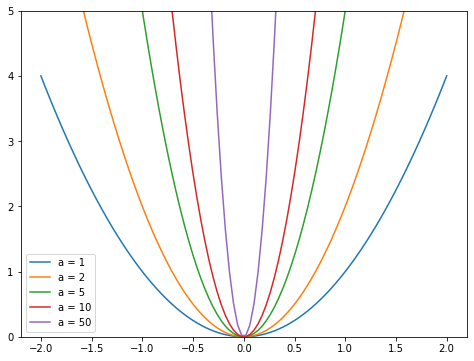

In [ ]:
x = np.linspace(-2,2,100)
a_s = [1,2,5,10,50]
ys = [a*x**2 for a in a_s]
_, ax = plt.subplots(figsize=(8,6))
for a, y in zip(a_s,ys):
    ax.plot(x, y ,label=f'a = {a}')
    ax.set_ylim([0,5])
    ax.legend()
    

In [ ]:
model = DotProductBias(n_users,n_movies,50)
learn = Learner(dls, model, loss_func=MSELossFlat())
learn.fit_one_cycle(5, 5e-3,wd=0.1)

epoch,train_loss,valid_loss,time
0,0.932776,0.961672,00:07
1,0.888625,0.882614,00:07
2,0.771066,0.832743,00:07
3,0.599807,0.822374,00:07
4,0.504981,0.822528,00:07


In [ ]:
class T(Module):
    def __init__(self):
        self.a = torch.ones(3)
        
L(T().parameters())

(#0) []

In [ ]:
class T(Module):
    def __init__(self):
        self.a = nn.Parameter(torch.ones(3))

t = T()
L(t.parameters())

(#1) [Parameter containing:
tensor([1., 1., 1.], requires_grad=True)]

In [ ]:
class T(Module):
    def __init__(self):
        self.a = nn.Linear(1,3,bias=False)

t = T()
L(t.parameters())

(#1) [Parameter containing:
tensor([[-0.3292],
        [-0.8623],
        [ 0.0592]], requires_grad=True)]

In [ ]:
type(t.a.weight)

torch.nn.parameter.Parameter

In [ ]:
import torch 
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
def create_params(size):
    return nn.Parameter(torch.zeros(*size).normal_(0, 0.01))

In [ ]:
class DotProductBias(Module):
    def __init__(self, n_users, n_movies, n_factors, y_range=(0,5.5)):
        self.user_factors = create_params([n_users,n_factors])
        self.user_bias = create_params([n_users])
        self.movie_factors = create_params([n_movies,n_factors])
        self.movie_bias = create_params([n_movies])
        self.y_range = y_range

    def forward(self, x):
        users = self.user_factors[x[:,0]]
        movies = self.movie_factors[x[:,1]]
        res = (users * movies).sum(dim=1)
        res += self.user_bias[x[:,0]] + self.movie_bias[x[:,1]]
        return sigmoid_range(res , *self.y_range)

In [ ]:
model = DotProductBias(n_users , n_movies, 50)
learn = Learner(dls , model , loss_func=MSELossFlat())
learn.fit_one_cycle(5,5e-3,wd=0.1)

epoch,train_loss,valid_loss,time
0,0.929254,0.953444,00:07
1,0.865246,0.878304,00:07
2,0.720294,0.838921,00:07
3,0.582796,0.829129,00:07
4,0.474043,0.829031,00:07


In [ ]:
movie_bias = learn.model.movie_bias.squeeze()
idxs = movie_bias.argsort()[:5]
[dls.classes['title'][i] for i in idxs]

['Lawnmower Man 2: Beyond Cyberspace (1996)',
 'Children of the Corn: The Gathering (1996)',
 'Mortal Kombat: Annihilation (1997)',
 'Amityville 3-D (1983)',
 'Beautician and the Beast, The (1997)']

In [ ]:
movie_bias

tensor([-0.0007, -0.1023,  0.0162,  ..., -0.0325,  0.0757,  0.0211], device='cuda:0', grad_fn=<SqueezeBackward0>)

In [ ]:
idxs

tensor([ 850,  295, 1001,   62,  140], device='cuda:0')

In [ ]:
movie_bias[295],movie_bias[850]

(tensor(-0.3136, device='cuda:0', grad_fn=<SelectBackward>),
 tensor(-0.3198, device='cuda:0', grad_fn=<SelectBackward>))

In [ ]:
dls.classes

{'title': ['#na#', "'Til There Was You (1997)", '1-900 (1994)', '101 Dalmatians (1996)', '12 Angry Men (1957)', '187 (1997)', '2 Days in the Valley (1996)', '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)', '3 Ninjas: High Noon At Mega Mountain (1998)', '39 Steps, The (1935)', '8 1/2 (1963)', '8 Heads in a Duffel Bag (1997)', '8 Seconds (1994)', 'A Chef in Love (1996)', 'Above the Rim (1994)', 'Absolute Power (1997)', 'Abyss, The (1989)', 'Ace Ventura: Pet Detective (1994)', 'Ace Ventura: When Nature Calls (1995)', 'Across the Sea of Time (1995)', 'Addams Family Values (1993)', 'Addicted to Love (1997)', 'Addiction, The (1995)', 'Adventures of Pinocchio, The (1996)', 'Adventures of Priscilla, Queen of the Desert, The (1994)', 'Adventures of Robin Hood, The (1938)', 'Affair to Remember, An (1957)', 'African Queen, The (1951)', 'Afterglow (1997)', 'Age of Innocence, The (1993)', 'Aiqing wansui (1994)', 'Air Bud (1997)', 'Air Force One (1997)', 'Air Up There, The (199

In [ ]:
dls.classes['title'][1]

"'Til There Was You (1997)"

In [ ]:
dls.classes['user'][1]

1

In [ ]:
idxs = movie_bias.argsort(descending=True)[:5]
[dls.classes['title'][i] for i in idxs]

['Titanic (1997)',
 'Shawshank Redemption, The (1994)',
 'Silence of the Lambs, The (1991)',
 'L.A. Confidential (1997)',
 "Schindler's List (1993)"]

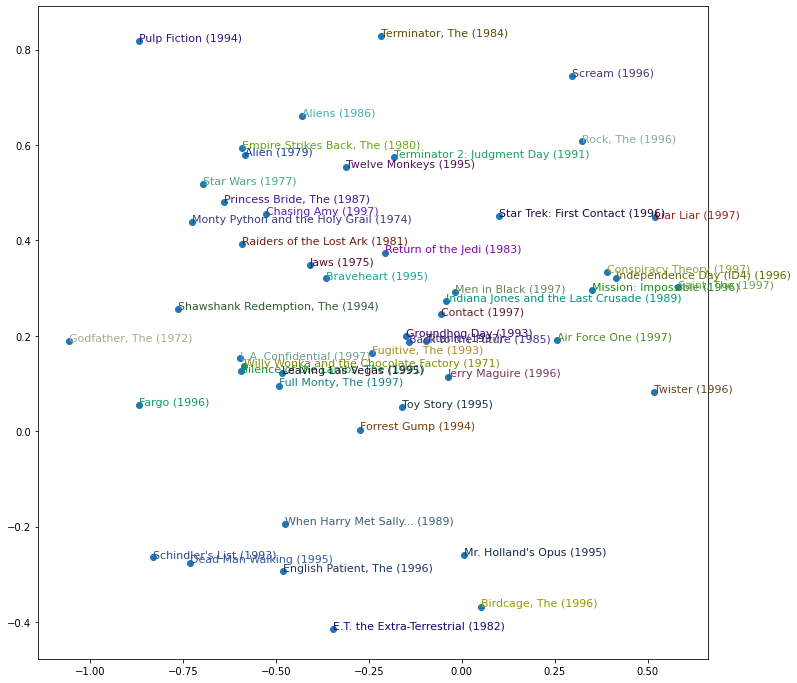

In [ ]:
g = ratings.groupby('title')['rating'].count()
top_movies = g.sort_values(ascending=False).index.values[:1000]
top_idxs = tensor([learn.dls.classes['title'].o2i[m] for m in top_movies])
movie_w = learn.model.movie_factors[top_idxs].cpu().detach()
movie_pca = movie_w.pca(3)
fac0, fac1, fac2 = movie_pca.t()
idxs = list(range(50))

X = fac0[idxs]
Y = fac2[idxs]

plt.figure(figsize=(12,12))
plt.scatter(X,Y)
for i ,x, y in zip(top_movies[idxs], X, Y):
    plt.text(x, y ,i,color=np.random.rand(3)*0.7,fontsize = 11)
plt.show()

In [ ]:
#Using fastai.collab

learn = collab_learner(dls, n_factors=50, y_range=(0,5.5))

In [ ]:
learn.fit_one_cycle(5, 5e-3,wd = 0.1)


epoch,train_loss,valid_loss,time
0,0.939464,0.954959,00:07
1,0.841215,0.876151,00:07
2,0.724404,0.832099,00:07
3,0.597228,0.816953,00:07
4,0.481373,0.817286,00:07


In [ ]:
learn.model

EmbeddingDotBias(
  (u_weight): Embedding(944, 50)
  (i_weight): Embedding(1665, 50)
  (u_bias): Embedding(944, 1)
  (i_bias): Embedding(1665, 1)
)

In [ ]:
movie_bias = learn.model.i_bias.weight.squeeze()
idxs = movie_bias.argsort(descending=True)[:5]
[dls.classes['title'][i] for i in idxs]

['L.A. Confidential (1997)',
 'Titanic (1997)',
 'Shawshank Redemption, The (1994)',
 'Silence of the Lambs, The (1991)',
 'Rear Window (1954)']

In [ ]:
movie_factors = learn.model.i_weight.weight
idx = dls.classes['title'].o2i['Silence of the Lambs, The (1991)']
distances = nn.CosineSimilarity(dim=1)(movie_factors, movie_factors[idx][None])
idx = distances.argsort(descending=True)[1]
dls.classes['title'][idx]

'Before the Rain (Pred dozhdot) (1994)'

In [ ]:
movie_factors = learn.model.i_weight.weight
idx = dls.classes['title'].o2i[' L.A. Confidential (1997)']
distances = nn.CosineSimilarity(dim=1)(movie_factors, movie_factors[idx][None])
idx = distances.argsort(descending=True)[1]
dls.classes['title'][idx]

'Return of the Jedi (1983)'

In [ ]:
movie_factors = learn.model.i_weight.weight
idx = dls.classes['title'].o2i['Titanic (1997)']
distances = nn.CosineSimilarity(dim=1)(movie_factors, movie_factors[idx][None])
idx = distances.argsort(descending=True)[1]
dls.classes['title'][idx]

'Forrest Gump (1994)'

In [ ]:
#Deep Learning for Collaborative Filtering

embs = get_emb_sz(dls)
embs

[(944, 74), (1665, 102)]

In [ ]:
class CollabNN(Module):
    def __init__(self, user_sz, item_sz, y_range=(0, 5.5),n_act=100):
        self.user_factors = Embedding(*user_sz)#(944, 74)
        self.item_factors = Embedding(*item_sz)#(1665, 102)
        self.layers = nn.Sequential(
                                       
            nn.Linear(user_sz[1]+ item_sz[1], n_act),#input176(74+102) -> output100(n_act)
            nn.ReLU(),                                         
            nn.Linear(n_act,1))#input100(n_act)-> output 1
        self.y_range = y_range

    def forward(self, x):
        embs = self.user_factors(x[:,0]),self.item_factors(x[:,1])
        x = self.layers(torch.cat(embs, dim= 1))#userデータとitemデータを足す
        return sigmoid_range(x, *self.y_range)



In [ ]:
model = CollabNN(*embs)
model

CollabNN(
  (user_factors): Embedding(944, 74)
  (item_factors): Embedding(1665, 102)
  (layers): Sequential(
    (0): Linear(in_features=176, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=1, bias=True)
  )
)

In [ ]:
learn = Learner(dls,model,loss_func=MSELossFlat())
learn.fit_one_cycle(5,5e-3,wd = 0.01)

epoch,train_loss,valid_loss,time
0,0.944571,0.952126,00:08
1,0.913312,0.899589,00:07
2,0.847521,0.880908,00:07
3,0.807906,0.873375,00:08
4,0.756004,0.876437,00:08
